In [3]:
# The Stanard Hodgepodge of Imports for Python
import qutip as qt
import qutip.states as qts
import qutip.operators as qto
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import seaborn as sns
from functools import reduce
from functools import partial
from scipy.stats import entropy as entropy
import networkx as nx
import numpy as np

sys.path.append("../dwaveutils/dwavetools")
sys.path.append("../dwaveutils/probrep")
from dictrep import DictRep
from dwavetools import (nqubit_1pauli, nqubit_2pauli, loadAandB, dict_to_qutip,
                       make_numeric_schedule, get_numeric_H, time_interpolation,
                       gs_calculator, random_partition, KL_div)

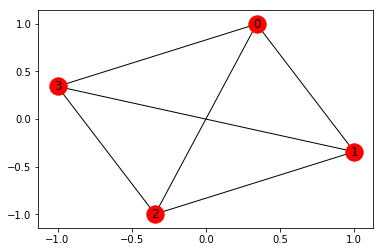

In [2]:
# First, let's create a sample 4 qubit Hamiltonian no h bias
dictH = {(0, 0): 1, (1, 1): 1, (2, 2): 1, (3, 3): 0, (0, 1): 1, (1, 2): -1, (2, 3): 1, (0, 3): -1, (1, 3): 1, (0, 2): -1}
H = DictRep(H = dictH, qpu = 'numerical', vartype = 'ising', encoding = 'logical')
graph = H.visualize_graph()

In [3]:
# set-up the problem
T = 10
s = 0.5
forward_schedule = make_numeric_schedule(.1, **{'direction': 'forward', 'ta': T})
reverse_schedule = make_numeric_schedule(.1, **{'direction': 'reverse', 'ta': T/2,\
                                          'sa': s, 'tq': T/2})
schedules = [forward_schedule, reverse_schedule]
partition = random_partition(H)
Rstate = H.nqubits*'1'
FREMstate = len(partition['Rqubits'])*'1'

In [4]:
# obtain direct diag, forward, reverse, and frem anneal
diag = H.diag_H()
forward = H.nf_anneal(forward_schedule)
reverse = H.nr_anneal(reverse_schedule, Rstate)
frem = H.frem_anneal(schedules, partition, FREMstate)

In [5]:
others = {'forward': forward, 'reverse': reverse, 'frem': frem}

In [6]:
KL_div(diag, others)

{'forward': array([0.0052408]),
 'reverse': array([6.4618714]),
 'frem': array([0.39040201])}

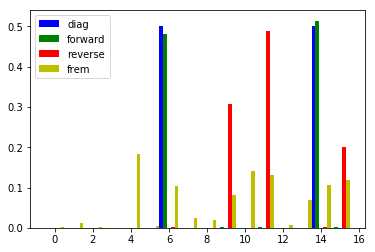

In [8]:
# plot the results
states = np.linspace(0, H.Hsize-1, H.Hsize)
ax = plt.subplot(111)
ax.bar(states-.4, diag.flatten(),width=0.2,color='b',align='center',label='diag')
ax.bar(states-.2, forward.flatten(),width=0.2,color='g',align='center', label='forward')
ax.bar(states+.2, reverse.flatten(),width=0.2,color='r',align='center', label='reverse')
ax.bar(states+.4, frem.flatten(),width=0.2,color='y',align='center',label='frem')
plt.legend()

In [7]:
partition

{'HR': {(0, 0): 1,
  (0, 1): 1,
  (0, 2): -1,
  (0, 3): -1,
  (1, 1): 1,
  (1, 3): 1,
  (2, 2): 1,
  (1, 2): -1,
  (3, 3): 0},
 'Rqubits': [0, 1, 2],
 'HF': {(0, 0): 0, (1, 1): 0, (2, 2): 0, (3, 3): 0, (2, 3): 1}}

In [21]:
np.random.seed(3)
a = np.random.rand(4, 4)
m = np.tril(a) + np.tril(a, -1).T
blah = np.matrix(m)

In [16]:
np.savetxt('trial.txt', blah, fmt='%.8f')

In [22]:
blah

matrix([[0.5507979 , 0.89294695, 0.0514672 , 0.64914405],
        [0.89294695, 0.89629309, 0.44080984, 0.27848728],
        [0.0514672 , 0.44080984, 0.02987621, 0.6762549 ],
        [0.64914405, 0.27848728, 0.6762549 , 0.59086282]])